In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.4.0


In [2]:
tf.debugging.set_log_device_placement(True)

In [24]:
x = np. array([137.97, 104.50, 100.00, 126.32, 79.20, 99.00, 124.00, 114.00, 106.69, 140.05, 53.75, 46.91, 68.00, 63.02, 81.26, 86.21])
y = np.array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

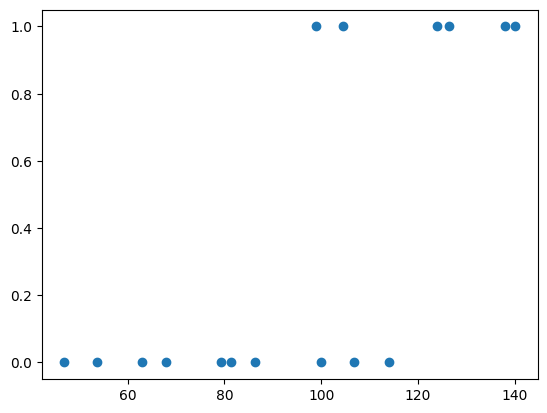

In [25]:
plt.scatter(x,y)

In [26]:
x_train = x - np.mean(x)
y_train = y

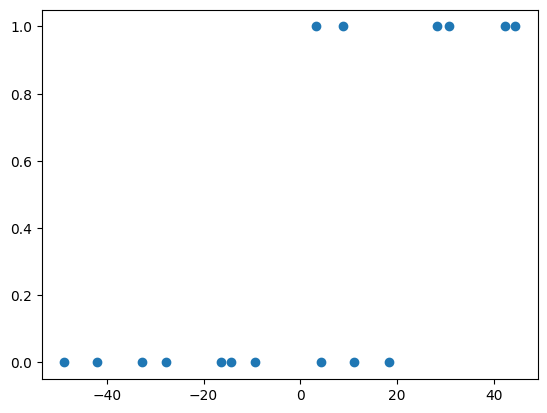

In [27]:
plt.scatter(x_train,y_train)

In [28]:
learn_rate = 0.005
iter = 5
display_step = 1

In [29]:
np.random.seed(612)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

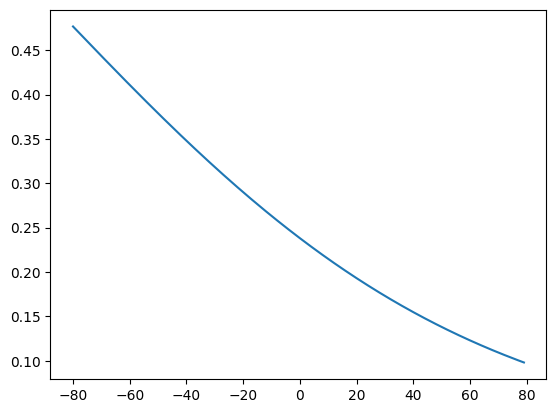

In [30]:
x_ = range(-80,80)
y_ = 1/(1+tf.exp(-(w*x_+b)))
plt.plot(x_,y_)

i: 0,Train Loss: 0.852807, Accuracy: 0.625000
i: 1,Train Loss: 0.400259, Accuracy: 0.875000
i: 2,Train Loss: 0.341504, Accuracy: 0.812500
i: 3,Train Loss: 0.322571, Accuracy: 0.812500
i: 4,Train Loss: 0.313972, Accuracy: 0.812500
i: 5,Train Loss: 0.309411, Accuracy: 0.812500


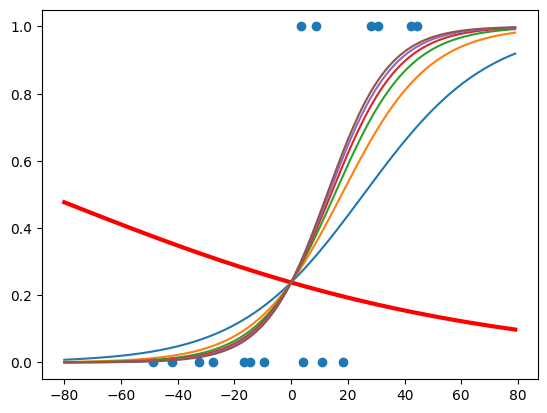

In [31]:
plt.scatter(x_train,y_train)
plt.plot(x_,y_,color="red",linewidth=3)

cross_train = []
acc_train = []

for i in range(0, iter + 1):
    with tf.GradientTape() as tape:
        pred_train = 1/(1+tf.exp(-(w*x_train+b)))
        Loss_train = -tf.reduce_mean(y_train*tf.math.log(pred_train)+(1-y_train)*tf.math.log(1-pred_train))
        Accuracy_train = tf.reduce_mean(tf.cast(tf.equal(tf.where(pred_train<0.5, 0, 1), y_train),tf.float32))
        
    cross_train.append(Loss_train)
    acc_train.append(Accuracy_train)
    
    dL_dW,dL_db = tape.gradient(Loss_train,[w,b])
    
    w.assign_sub(learn_rate*dL_dW)
    b.assign_sub(learn_rate*dL_db)
    
    if i % display_step == 0:
        print("i: %i,Train Loss: %f, Accuracy: %f" % (i, Loss_train, Accuracy_train))
        y_=1/(1+tf.exp(-(w*x_+b)))
        plt.plot(x_,y_)